<a href="https://colab.research.google.com/github/tanaymukherjee/Time-Series-Modeling/blob/master/2_Creating_a_Time_Series_object.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time Series Analysis

### Definition:
A sequence of information which attaches a time period to each value.

### Common Objective:
1. Determining the stability of financial markets and the efficiency portfolios.
2. Weather forcasting based on past records.

#### Import Libraries

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import pylab

#### Mounting Google colab with personal GDrive

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


#### Checking the content in my GDrive witihin the working directory

In [8]:
!ls -ahl "/content/gdrive/My Drive/Colab Notebooks/Data"

total 291K
-rw------- 1 root root 291K May 31 02:02 Index2018.csv


#### Read the dataset

In [0]:
data = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/Data/Index2018.csv")

#### View the dataset summary

Date column includes the timen period where as the other features tell us the stability of market.

1. SPX is US stock exchange by S&P 500
2. DAX is German stock exchange by  DAX 30
3. FTSE is UK stock exchange by FTSE 100
4. NIKKEI is Japan stock exchange by NIKKEI 225

In [13]:
df = data.copy()
df.head()

,date,spx,dax,ftse,nikkei
0,07/01/1994,469.90,2224.95,3445.98,18124.01
1,10/01/1994,475.27,2225.00,3440.58,18443.44
2,11/01/1994,474.13,2228.10,3413.77,18485.25
3,12/01/1994,474.17,2182.06,3372.02,18793.88
4,13/01/1994,472.47,2142.37,3360.01,18577.26


In [14]:
df.describe()

,spx,dax,ftse,nikkei
count,6269.000000,6269.000000,6269.000000,6269.000000
mean,1288.127542,6080.063363,5422.713545,14597.055700
std,487.586473,2754.361032,1145.572428,4043.122953
min,438.920000,1911.700000,2876.600000,7054.980000
25%,990.671905,4069.350000,4486.100000,10709.290000
50%,1233.420000,5773.340000,5662.430000,15028.170000
75%,1459.987747,7443.070000,6304.250000,17860.470000
max,2872.867839,13559.600000,7778.637689,24124.150000


#### Check for missing values

In [15]:
df.isna()

,date,spx,dax,ftse,nikkei
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
6264,False,False,False,False,False
6265,False,False,False,False,False
6266,False,False,False,False,False
6267,False,False,False,False,False


In [16]:
df.isna().sum()

date      0
spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

#### Plotting the data

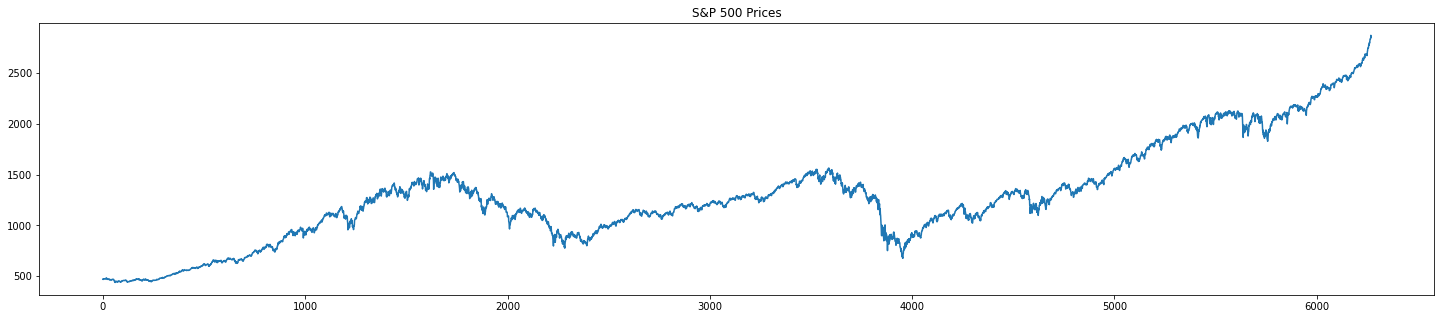

In [22]:
df.spx.plot(title = "S&P 500 Prices", figsize=(25,5))
plt.show()

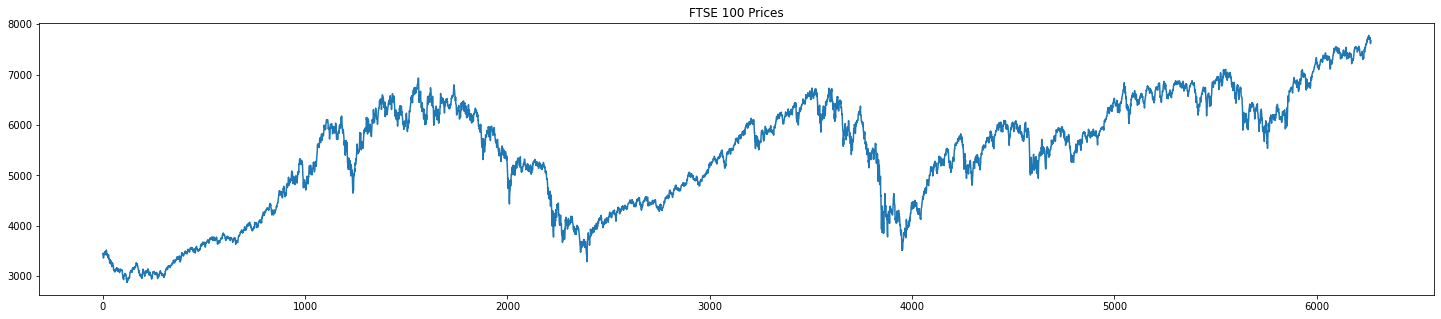

In [23]:
df.ftse.plot(title = "FTSE 100 Prices", figsize=(25,5))
plt.show()

##### Plotting all the stock markerts together

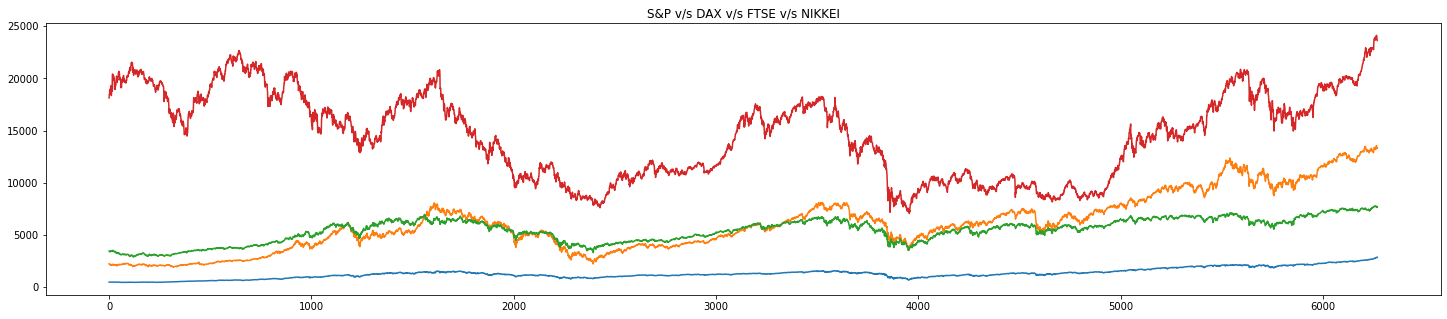

In [25]:
df.spx.plot(title = "S&P 500 Prices", figsize=(25,5))
df.dax.plot(title = "DAX 30 Prices", figsize=(25,5))
df.ftse.plot(title = "FTSE 100 Prices", figsize=(25,5))
df.nikkei.plot(title = "NIKKEI 225 Prices", figsize=(25,5))
plt.title("S&P v/s DAX v/s FTSE v/s NIKKEI")
plt.show()

### QQ Plots

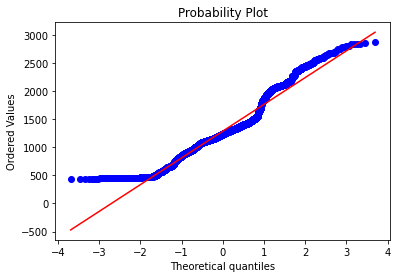

In [29]:
scipy.stats.probplot(df.spx, plot = pylab)
pylab.show()

#### From text to date

In [33]:
df.date = pd.to_datetime(df.date, dayfirst=True)
df.head()

,date,spx,dax,ftse,nikkei
0,1994-01-07,469.90,2224.95,3445.98,18124.01
1,1994-01-10,475.27,2225.00,3440.58,18443.44
2,1994-01-11,474.13,2228.10,3413.77,18485.25
3,1994-01-12,474.17,2182.06,3372.02,18793.88
4,1994-01-13,472.47,2142.37,3360.01,18577.26


In [36]:
df.date.describe()

count                    6269
unique                   6269
top       1999-08-23 00:00:00
freq                        1
first     1994-01-07 00:00:00
last      2018-01-29 00:00:00
Name: date, dtype: object

#### Setting the index

In [0]:
df.set_index("date", inplace=True)

In [38]:
df.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


In [40]:
df.date.describe()

# it throws an error because once date becomes an index, it is no longer a seperate attribute in the dataframe.

AttributeError: ignored

#### Setting the frequency

In [43]:
# When we wish to define the frequency by day
df = df.asfreq('d')
df.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-08,NaN,NaN,NaN,NaN
1994-01-09,NaN,NaN,NaN,NaN
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25


In [44]:
# What if we wish to not include the weekends because the stock markets are not operative?

df = df.asfreq('b')
df.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


#### Handling missing values

In [47]:
df.isna()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,False,False,False,False
1994-01-10,False,False,False,False
1994-01-11,False,False,False,False
1994-01-12,False,False,False,False
1994-01-13,False,False,False,False
...,...,...,...,...
2018-01-23,False,False,False,False
2018-01-24,False,False,False,False
2018-01-25,False,False,False,False


In [46]:
df.isna().sum()

# We see there are 8 missing values for each stock market.
# Setting the frequency to business days thus generated these 8 missing values.

spx       8
dax       8
ftse      8
nikkei    8
dtype: int64

In [0]:
# Filling data
# 1. Front filling
# 2. Back filling
# 3. Assign the same value

# Front fill the spx
df.spx = df.spx.fillna(method = "ffill")

In [49]:
df.isna().sum()

spx       0
dax       8
ftse      8
nikkei    8
dtype: int64

In [0]:
# Back fill the ftse
df.ftse = df.ftse.fillna(method = "bfill")

# Average fill the dax and nikkei
df.dax = df.dax.fillna(value = df.dax.mean())
df.nikkei = df.nikkei.fillna(value = df.nikkei.mean())

In [51]:
df.isna().sum()

spx       0
dax       0
ftse      0
nikkei    0
dtype: int64